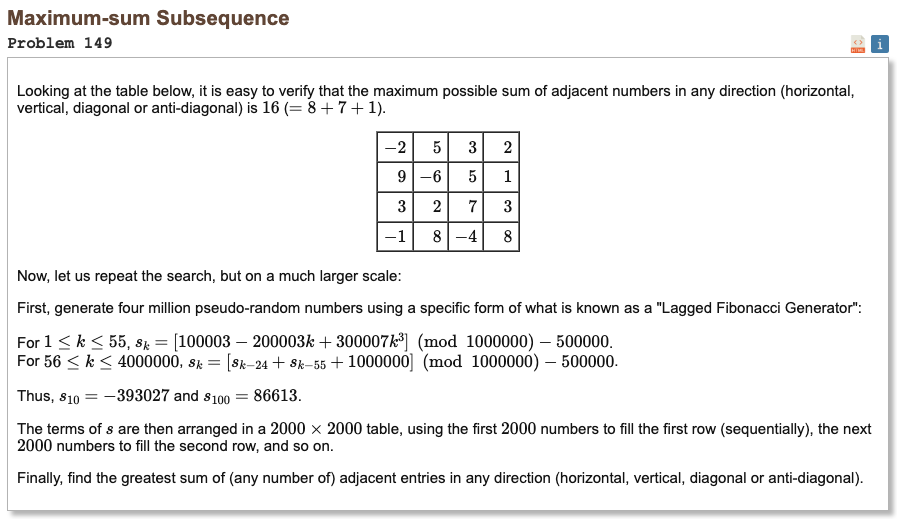

## Initial approach

* generate 4 million numbers with the given lagged fibonacci rules
* load them row by row into a 2000 by 2000 grid
* keep only a rolling window of the last 55 values while generating so memory stays small
* the answer is the best kadane sum over every straight line in the grid
* run kadane on each row left to right
* run kadane on each column top to bottom
* run kadane on each main diagonal where i minus j is constant
* run kadane on each anti diagonal where i plus j is constant
* track the global maximum across all four directions and print it

In [1]:
def generate_grid(n=2000):
    m = 1000000
    grid = [[0]*n for _ in range(n)]
    last55 = [0]*55
    for k in range(1, 56):
        val = (100003 - 200003*k + 300007*k*k*k) % m - 500000
        last55[k-1] = val
        idx = k-1
        grid[idx//n][idx % n] = val
    for k in range(56, n*n + 1):
        v = (last55[(k-25) % 55] + last55[(k-56) % 55] + m) % m - 500000
        last55[(k-1) % 55] = v
        idx = k-1
        grid[idx//n][idx % n] = v
    return grid

def kadane_iter(seq_iter):
    best = None
    cur = 0
    for x in seq_iter:
        if best is None:
            best = x
            cur = x
        else:
            cur = x if cur + x < x else cur + x
            if cur > best:
                best = cur
    return best if best is not None else 0

def max_sum_any_direction(grid):
    n = len(grid)
    ans = -10**18
    for i in range(n):
        val = kadane_iter(grid[i][j] for j in range(n))
        if val > ans:
            ans = val
    for j in range(n):
        val = kadane_iter(grid[i][j] for i in range(n))
        if val > ans:
            ans = val
    for d in range(-(n-1), n):
        def diag_gen():
            i = max(0, d)
            j = i - d
            while i < n and j < n:
                yield grid[i][j]
                i += 1
                j += 1
        val = kadane_iter(diag_gen())
        if val > ans:
            ans = val
    for s in range(0, 2*n - 1):
        def anti_gen():
            i = max(0, s - (n - 1))
            j = s - i
            while i < n and j >= 0 and j < n:
                yield grid[i][j]
                i += 1
                j -= 1
        val = kadane_iter(anti_gen())
        if val > ans:
            ans = val
    return ans

In [2]:
%%time
grid = generate_grid(2000)
result = max_sum_any_direction(grid)
print("Result:", result)

Result: 52852124
CPU times: user 2.28 s, sys: 29.1 ms, total: 2.31 s
Wall time: 2.33 s
